In [1]:
import os # working with os
import warnings
warnings.filterwarnings("ignore")
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # no debug TF info
import tensorflow as tf # high level framework for NN
from tensorflow.keras.models import load_model # lib for easier NN coding with Tensorflow
import numpy as np #matrixes and tensors 
import cv2 # computer vision algorithms
import json # JSON lib
import math # math module 
from progress_bar import printProgressBar # beautiful progress bar :3
import csv 
import model as m # object with our model 
import argparse # parsing input argument
from random import randrange
import matplotlib.pyplot as plt

def finderCV(mask,criteria=0.5,img=None):
            mask = np.where(mask > criteria, 1, 0)
            arr = []
            im1 = np.ascontiguousarray(mask, dtype=np.uint8)
            contours, hierarchy = cv2.findContours(im1, cv2.RETR_TREE , cv2.CHAIN_APPROX_NONE)
            for cnt in contours:
                    arr.append(cv2.minAreaRect(cnt))
 
            return arr ## OpenCV algorithm which finds contours of bacteria


In [2]:
def photos(folder):
#     folder = "photo_elena/"
    files=os.listdir(folder)
    print("%20s|%20s|%20s|"%("file","perpendicularly","parallel"))
    for photo in files:
#         if 'dno' not in photo:
#             continue
        pic = 255 - cv2.imread(folder+photo,cv2.IMREAD_GRAYSCALE)
        mask = m.recognize(pic)
        rec = finderCV(mask)
        L = np.array([max(x[1]) for x in rec])
        W = np.array([min(x[1]) for x in rec])
        #par = np.array([L,W],dtype=np.float32)н
        e = np.sqrt(1-np.where(L==0, 0, W/L))
        per = np.count_nonzero(e < 0.1)
        par = np.count_nonzero(e >=0.1)
        print("%20s|%20d|%20d|"%(photo,per,par))

In [3]:
def video(folder):
    files=os.listdir(folder)
    print(len(files))
    bins = 25
    frames = np.zeros([1,bins])
    e = []
    for i in range(0,len(files),20):
        print(i,end='')
#         print(folder)
#         print(files[i])
        pic = cv2.imread(folder+"/"+files[i],cv2.IMREAD_GRAYSCALE)
#         print(pic.shape)
        mask = m.recognize(pic)
        rec = finderCV(mask)
        L = np.array([max(x[1]) for x in rec])
        W = np.array([min(x[1]) for x in rec])
        #par = np.array([L,W],dtype=np.float32)н
        e = np.sqrt(1-np.where(L==0, 0, W/L))
        #per = np.count_nonzero(e < 0.1)
        #par = np.count_nonzero(e >=0.1)
        e = np.histogram(e,bins=25)  
        frames = np.append(frames,np.expand_dims(e[0],axis=0),axis=0)
    return frames,e[1]

In [22]:
folders=os.listdir('/home/korolaab/Downloads/archive')
Y_arr=[]
X_arr = []
for i in range(len(folders)):
     Y,X = video("/home/korolaab/Downloads/archive/"+folders[i])
     #Y_arr.append(np.median(Y,axis=0))
     Y_arr.append(Y)    
     X_arr.append(X)

290
020406080100120140160180200220240260280290
020406080100120140160180200220240260280290
020406080100120140160180200220240260280290
020406080100120140160180200220240260280

In [59]:
Y_arr[0].sum(axis=1)

array([  0., 222., 226., 232., 251., 255., 226., 218., 239., 229., 251.,
       266., 254., 224., 261., 244.])

ValueError: x and y must be the same size

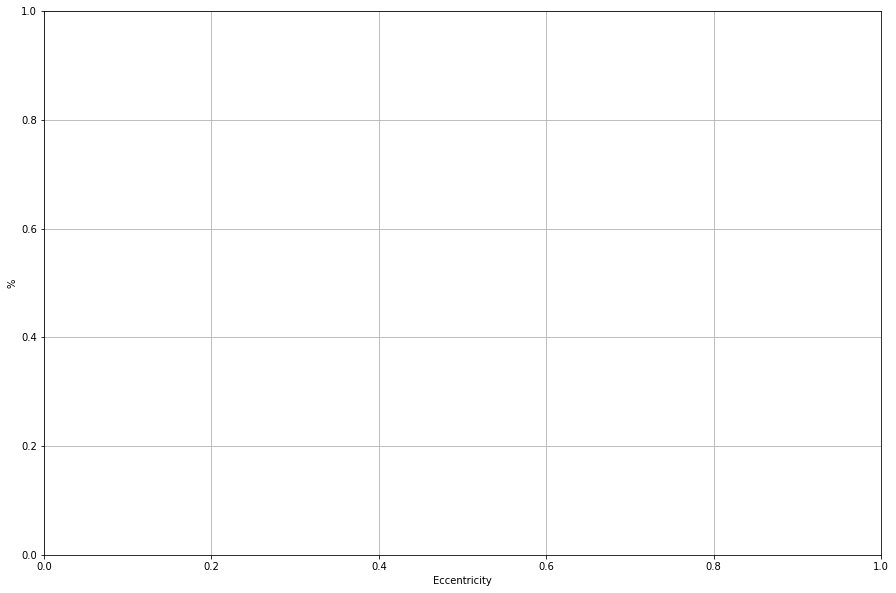

In [53]:
from matplotlib.ticker import FuncFormatter
fig,ax=plt.subplots(1,figsize =(15,10))
folders = os.listdir("/home/korolaab/Downloads/archive/")
ax.grid(True)
ax.set_xlabel("Eccentricity")
ax.set_ylabel("%",rotation=90)
for i in range(len(folders)):
    if(i == 1):
        continue
    ax.scatter(X_arr[i][:-1],Y_arr[i]/Y_arr[i].sum(),label=folders[i])
    ax.plot(X_arr[i][:-1],Y_arr[i]/Y_arr[i].sum())
ax.set_yscale("log")
#ax.set_yticks([1,2,3,4,5,10,20,30,40,50,100])
#ax.set_yticks(np.arange(0,0.1,10))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y,_:'{:.16g}'.format(y)))
ax.legend()


In [6]:
X = np.array(X_arr[i][:-1])
Y = np.array(Y_arr)

In [7]:
np.savetxt('X.csv',X,delimiter=',',fmt='%.3f')
np.savetxt('Y.csv',Y.T,delimiter=',',fmt='%.3f')

In [8]:
print( folders)

['m17OD2inv200-490frames', 'EHECOD2_dno_first290frames_inv', 'EHECOD2_first290frames', 'jM109OD2-4_first290frames']
